###LAB 3### 
19.03


REGRESJA LOGISTYCZNA 

Regresja logistyczna opsiuje prawdopodobieństwo przynależności do jednej z dwóch klas (0 lub 1) według funkcji sugmoidalnej (sigma)
h(x) = 1/(1+ e^(-z))
gdzie z = theta0 +theta0*x
lub w postaci macierzowej 
z = theta.T * X

theta to wektor parametrów [theta0 ; theta1]
X to wektor cech [1 x]


(2, 8)
Xshape, yshape, thatshape  (2, 8) (1, 8) (2, 1)
Optymalne theta:
 [[-20.86620208]
 [  7.95418451]]
Liczba iteracji: 27199


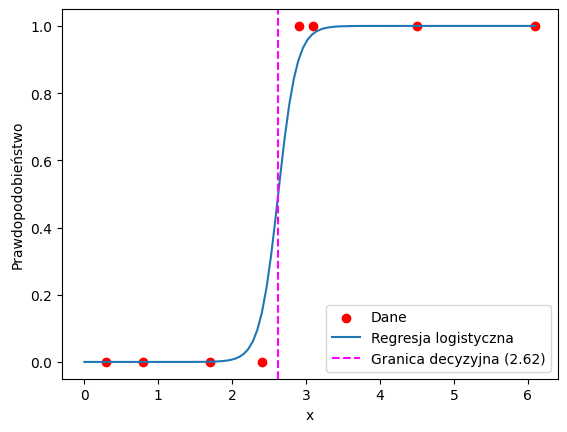

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1 - y) * np.log(1 - h)
    return (y_1 + y_0).sum() / X.shape[1]


# Dane wejściowe
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

print(X.shape)

theta = np.array([[0.0], [0.0]])
alpha = 0.1
eps = 1e-6

def min_gradient_prosty(X, y, theta, alpha, eps, max_iter) -> tuple[np.array, int]:
    previous_cost = float("inf")
    iter_count = 0  # Licznik iteracji
    
    while iter_count < max_iter:
        h_y_diff = h_fun(X, theta) - y
        gradient = (X @ h_y_diff.T) / y.shape[1]
        theta = theta - alpha * gradient

        current_cost = calculate_cost(X, y, theta)
        if abs(previous_cost - current_cost) < eps:
            break
        
        previous_cost = current_cost
        iter_count += 1

    return theta, iter_count

print("Xshape, yshape, thatshape ", X.shape, y.shape, theta.shape)
theta, iter = min_gradient_prosty(X, y, theta, alpha, eps, 100000)
print("Optymalne theta:\n", theta)
print("Liczba iteracji:", iter)

# Obliczanie granicy decyzyjnej
#przekształcam wzór theta0 + theta1*x = 0 na x = -theta0/theta1
decision_boundary_x = -theta[0, 0] / theta[1, 0]
# Generowanie wykresu

x_vals = np.linspace(0, np.max(X[1, :]), 100)

#print("x_vals:", x_vals.shape) # (100,)
X_plot = np.vstack((np.ones(x_vals.shape), x_vals))
#Tworzy macierz cech dla nowych wartości 
#x, aby móc obliczyć przewidywane wartości funkcji logistycznej.
#print("X_plot:", X_plot.shape) # (2, 100)

y_vals = h_fun(X_plot, theta)
#Oblicza przewidywane wartości funkcji logistycznej dla nowych wartości x.
#print("y_vals:", y_vals.shape) # (1, 100)

plt.scatter(X[1, :], y, color='red', label='Dane')
plt.plot(x_vals, y_vals.flatten(), label='Regresja logistyczna')
#.flatten - zmienia macierz na wektor

# Rysowanie obliczonej granicy decyzyjnej
plt.axvline(x=decision_boundary_x, color='magenta', linestyle='--', label=f'Granica decyzyjna ({decision_boundary_x:.2f})')

plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo')
plt.legend()
plt.show()

Zadanie 2

X.shape=(3, 100)
y.shape=(1, 100)
[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1. 

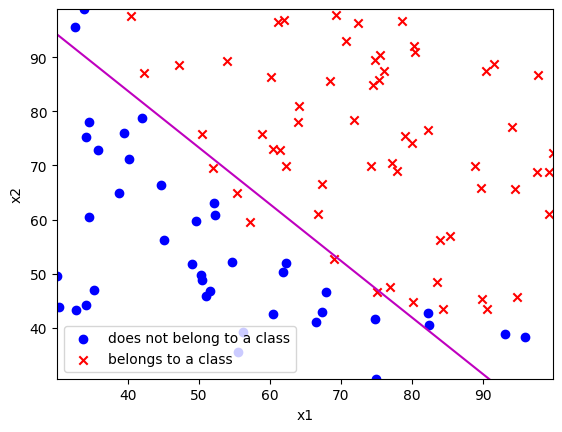

In [3]:
import csv
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}') # (3, 100)
print(f'{y.shape=}') # (1, 100)
print(X)
print(y)
# Inicjalizacja parametrów
theta = np.zeros((X.shape[0], 1))
alpha = 1e-3  # Współczynnik uczenia
eps = 1e-10 

theta, iterations = min_gradient_prosty(X, y, theta, alpha, eps, 1000000)

print(f"Optimal theta: {theta.T}")
print(f"Iterations: {iterations}")

# Wizualizacja
plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], c='b', marker='o', label='does not belong to a class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], c='r', marker='x', label='belongs to a class')

x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m')
plt.xlim(X[1, :].min(), X[1, :].max())
plt.ylim(X[2, :].min(), X[2, :].max())

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


zadanie 3


(4, 100)
X.shape=(4, 100)
y.shape=(1, 100)
Optimal theta: [[-28.40884177  84.90491925  25.37916676 -60.68041516]]
Iterations: 100000000


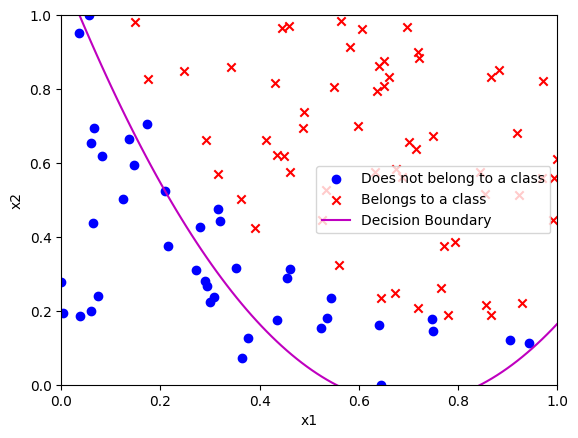

In [4]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])
    print(X.shape)
X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

print(f'{X.shape=}') # (4, 100)
print(f'{y.shape=}') # (1, 100)

alpha = 1e-3  # Współczynnik uczenia
eps = 1e-10 
theta = np.zeros((X.shape[0], 1))

theta, iterations = min_gradient_prosty(X, y, theta, alpha, eps, 100000000)

print(f"Optimal theta: {theta.T}")
print(f"Iterations: {iterations}")

plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], c='b', marker='o', label='Does not belong to a class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], c='r', marker='x', label='Belongs to a class')

# Obliczanie granicy decyzyjnej
x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100)

# Obliczanie x2 dla nieliniowej granicy
x2_db = -theta[0, 0]/theta[2, 0] - (theta[1, 0]/theta[2, 0])*x1_db - (theta[3, 0]/theta[2, 0])*x1_db**2

# Rysowanie granicy decyzyjnej
plt.plot(x1_db, x2_db, '-m', label='Decision Boundary')

# Dostosowanie granic osi
plt.xlim(X[1, :].min(), X[1, :].max())
plt.ylim(X[2, :].min(), X[2, :].max())

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Zadanie 4


Zadanie polega na dopasowaniu 10 modeli regresji logistycznej do rozpoznawania odręcznie pisanych cyfr z bazy digits framwework. 


 x shape: (1797, 64), y.shape:(1797,)
Liczba unikalnych wartości: (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.]), 17)
 macierz obrazu 8x8 [[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]], Cyfra na obrazie 8


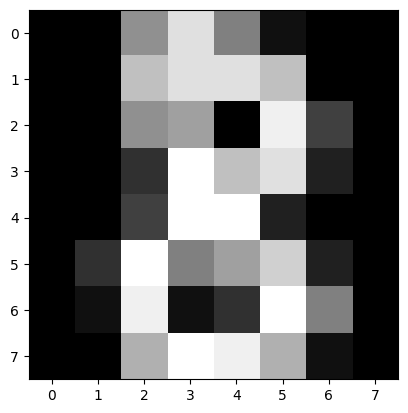

Zbiór po podzieleniu na uczący i testowy: x uczący (1347, 64), x testowy (450, 64), y uczący (1347,), y testowy (450,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

def h_fun(X, theta):
    z = theta.T @ X
    return 1.0 / (1.0 + np.exp(-z))

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1 - y) * np.log(1 - h)
    return (y_1 + y_0).sum() / X.shape[1]

def min_gradient_prosty(X, y, theta, alpha, eps, max_iter=10000):
    previous_cost = float("inf")
    iter_count = 0
    
    while iter_count < max_iter:
        h_y_diff = h_fun(X, theta) - y
        gradient = (X @ h_y_diff.T) / y.shape[1]
        theta = theta - alpha * gradient
        
        current_cost = calculate_cost(X, y, theta)
        if abs(previous_cost - current_cost) < eps:
            break
        
        previous_cost = current_cost
        iter_count += 1
    
    return theta, iter_count

# Wczytanie danych
data = datasets.load_digits()
y = data['target']
x = data['data']

print(f" x shape: {x.shape}, y.shape:{ y.shape}")  # (1797, 64) (1797,)
unikalne_wartosci = np.unique(x)
print(f'Liczba unikalnych wartości: {unikalne_wartosci, len(unikalne_wartosci)}')

image = x[8].reshape(8, 8)
etykieta= y[8]
print(f" macierz obrazu 8x8 {image}, Cyfra na obrazie {etykieta}")
plt.imshow(image, cmap='gray')  # cmap='gray' ustawia kolory na skale szarości
plt.show()

# Podział na zbiór uczący i testowy
#Parametr random_state umożliwia uzyskanie tego samego podziału dla każdego wywołania
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)
print(f"Zbiór po podzieleniu na uczący i testowy: x uczący {x_train.shape}, x testowy {x_test.shape}, y uczący {y_train.shape}, y testowy {y_test.shape}")
#(1347, 64) (450, 64) (1347,) (450,)



Zmienna x przechowuje 1796 obrazów, gdzie każdy obraz składa się z 64 pikseli.
Za pomocą komendy reshape, jesteśmy w stanie wyświtlić obraz.
Zmienna y, przechowuje etykiety, które mówią nam jaka jest liczba na obrazku.
Każdy piksel, ma odcień szarości w skali 0-16, gdzie 0 to jest czarny, 16 biały.

In [6]:


m, n = x_train.shape # 1347, 64
x_scale = max(x_train.max(), x_test.max())
theta_list=[]
for cls_id in range(10):  # dla każdej cyfry (0-9)
    #print(f'Optymalizacja dla klasy {cls_id}')
    
    y_cls = (y_train == cls_id).astype(np.int8) 
    #   y_cls = (y_train == cls_id) szuka wszystkich obrazow, 
    # które mają daną zgodną etykietę (y)i zwraca tabelę [True, false ...]
    #następnie astype(np.int8) przekształca wartości True na 1, a False na 0
    #przez co tworzy model, który rozpoznaje tylko jedną cyfrę

    # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, y_cls.shape[0]]
    #(1, 1347)
      
    # Skalowanie danych
    x_tmp = np.array(x_train) / x_scale  
    #skalujemy zbiór uczący dzieki czemu wartości będą z przedziału 0-1
    #(1347, 64) #

    X_cls = np.concatenate([np.ones((1, y_cls.shape[1])), x_tmp.T])  

    #komenda concatenate łączy tablice wzdłuż osi y
    
    # Inicjalizacja wag
    theta_cls = np.zeros((x_tmp.shape[1] + 1, 1))  
    #theta ma mieć wymiar 65x1, ponieważ mamy 64 cechy + 1 bias

    # bias to wyraz wolny (stała wartość), który jest dodawany do każdego wyniku
    #przykładu, aby przesunąć wynik w górę lub w dół.
    
    #Liczymy thete dla klasy cls_id
    theta_cls, _ = min_gradient_prosty(X_cls, y_cls, theta_cls, 0.01, 1e-6)
    
    theta_list.append(theta_cls)
    #print(f'Optymalizacja zakończona dla klasy {cls_id}.')
print(f" ilośc wektorów theta, ma być 10 bo dla każdej cyfry 0-9 - {len(theta_list)}")

 ilośc wektorów theta, ma być 10 bo dla każdej cyfry 0-9 - 10


Szukanie 0 w zbiorze testowym na podstawie wyliczonego theta, dla wartosci theta dla 0

Prawdopodobieństwo dla pierwszej klasy: [[0.95643338]]


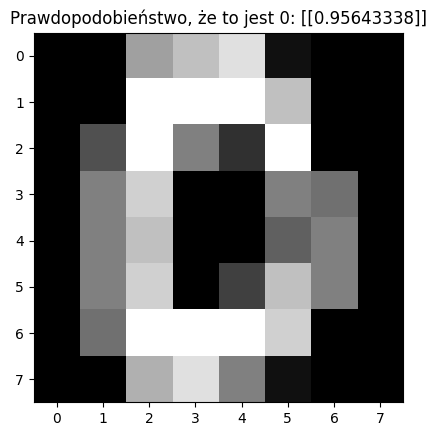

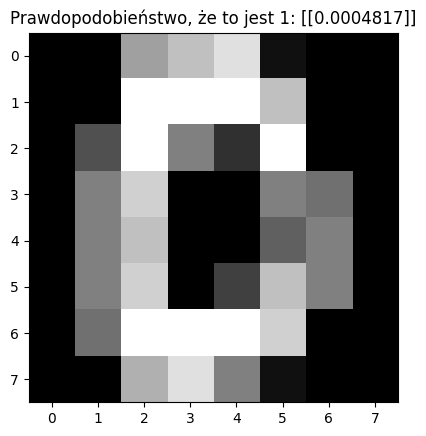

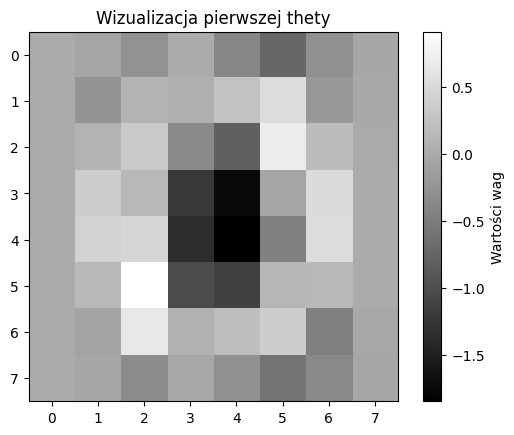

In [7]:
#print(y_test) 0 jest na 4, 20 i  36 miejscu.
pierwszsa_theta = theta_list[0]  # pierwszy wektor
x_example = np.array(x_test[20])  # przykładowe dane testowe (dla example_id=0)
x_example_normalized = x_example / 16.0  # normalizacja

X_example = np.array([1, *x_example_normalized])  # dodajemy 1 (bios) na początku
X_example = X_example[..., np.newaxis]  # dodanie nowego wymiaru (przydatne do operacji macierzowych)

# Obliczanie prawdopodobieństwa dla klasy przy użyciu sigmoid
prob = 1.0 / (1.0 + np.exp(-pierwszsa_theta.T @ X_example))
print(f"Prawdopodobieństwo dla pierwszej klasy: {prob}")
plt.imshow(x_example.reshape(8, 8), cmap='gray')
plt.title(f'Prawdopodobieństwo, że to jest 0: {prob}')
plt.show()

druga_theta = theta_list[1]  
x_example = np.array(x_test[20])  # przykładowe dane testowe (dla example_id=0)
x_example_normalized = x_example / 16.0  # normalizacja

X_example = np.array([1, *x_example_normalized])  # dodajemy 1 (bios) na początku
X_example = X_example[..., np.newaxis]  # dodanie nowego wymiaru (przydatne do operacji macierzowych)
prob = 1.0 / (1.0 + np.exp(-druga_theta.T @ X_example))

plt.imshow(x_example.reshape(8, 8), cmap='gray')
plt.title(f'Prawdopodobieństwo, że to jest 1: {prob}')
plt.show()


theta_image = pierwszsa_theta[1:].reshape(8, 8)  # Pomijamy bias (pierwszy element)

plt.imshow(theta_image, cmap='gray')
plt.colorbar(label='Wartości wag')
plt.title("Wizualizacja pierwszej thety")
plt.show()

Ewoluacja 

In [8]:
y_pred = []
for example_id in range(len(y_test)):
    probabs = np.zeros(10)
    
    # Ustalanie prawdopodobieństwa dla każdej z klas
    for cls_id, theta_cls in enumerate(theta_list):
        #enumerate pozwala na iterowanie po liscie elemetnach listy i ich indeksach
        x_example = np.array(x_test[example_id]) / 16.0  # normalizacja zbioru testowego
        X_example = np.array([1, *x_example])  # dodanie biasu
        X_example = X_example[..., np.newaxis]
        
        # Obliczenie prawdopodobieństwa
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))
    
    # Wybór klasy z najwyższym prawdopodobieństwem
    pred = np.argmax(probabs)
    y_pred.append(pred)

#print([int(x) for x in y_pred]) wyswitlamy wszystkie przewidywane wartości

x=0
poprawne=0
for ele in range(len(y_test)):
    x=x+1
    if y_test[ele] != y_pred[ele]:
        pass
        #print(f"element {ele} y_test {y_test[ele]} y_pred {y_pred[ele]}")
    if y_test[ele] == y_pred[ele]:
        poprawne=poprawne+1
print(f"Poprawne {poprawne} z {x} prób, skuteczność {poprawne/x*100}%")



num_classes = 10  # Zakładamy 10 klas (0-9)
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
total_samples = np.sum(conf_matrix)

# Obliczenie macierzy konfuzji ręcznie
for true_label, pred_label in zip(y_test, y_pred):
    conf_matrix[true_label, pred_label] += 1

print("Macierz konfuzji moja:")
print(conf_matrix)


num_classes = 10
se = []  # TP/(TP+FN) gdzie TP - True Positive, FN - False Negative
#Mierzy, jak dobrze model wykrywa pozytywne przypadki danej klasy
pp = []  # pp = TP/(TP+FP) gdzie FP - False Positive
# Mierzy, jak dokładne są przewidywania modelu dla danej klasy
for i in range(num_classes):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP  # Suma całej kolumny - TP (fałszywie pozytywne)
    FN = np.sum(conf_matrix[i, :]) - TP  # Suma całego wiersza - TP (fałszywie negatywne)
    
    # Obliczanie SE (Czułość)
    se_cls = TP / (TP + FN) 
    
    # Obliczanie PP (Precyzja)
    pp_cls = TP / (TP + FP) 
    
    se.append(se_cls)
    pp.append(pp_cls)

# Wyświetlanie wyników
for i in range(num_classes):
    print(f'Klasa {i} | SE: {se[i]:.2f} | PP: {pp[i]:.2f}')

#wiersze w maciezry konfuzji odpowiadaja etykietom prawdziwym, a kolumny etykietom przewidzianym
#diagonalne elementy macierzy konfuzji odpowiadają poprawnym klasyfikacjom
#poza diagonalą znajdują się błędne klasyfikacje

Poprawne 420 z 450 prób, skuteczność 93.33333333333333%
Macierz konfuzji moja:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  1  0  0  0  1  0  0  2]
 [ 0  2 46  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 1  0  0  0 48  0  0  2  1  0]
 [ 0  0  0  0  1 45  1  0  0  2]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  5  1  0  0  0  0  0 36  1]
 [ 0  0  0  0  0  0  0  2  3 39]]
Klasa 0 | SE: 1.00 | PP: 0.97
Klasa 1 | SE: 0.91 | PP: 0.84
Klasa 2 | SE: 0.94 | PP: 0.96
Klasa 3 | SE: 0.98 | PP: 1.00
Klasa 4 | SE: 0.92 | PP: 0.98
Klasa 5 | SE: 0.92 | PP: 0.98
Klasa 6 | SE: 0.96 | PP: 0.96
Klasa 7 | SE: 1.00 | PP: 0.89
Klasa 8 | SE: 0.84 | PP: 0.88
Klasa 9 | SE: 0.89 | PP: 0.89


C:\Users\kamil\AppData\Local\Temp\ipykernel_7372\456526397.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))


In [9]:

# Obliczanie macierzy konfuzji i raportu klasyfikacji
print("\nMacierz konfuzji:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRaport klasyfikacji:")
report = classification_report(y_test, y_pred)
print(report)



Macierz konfuzji:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  1  0  0  0  1  0  0  2]
 [ 0  2 46  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 1  0  0  0 48  0  0  2  1  0]
 [ 0  0  0  0  1 45  1  0  0  2]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  5  1  0  0  0  0  0 36  1]
 [ 0  0  0  0  0  0  0  2  3 39]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.84      0.91      0.88        47
           2       0.96      0.94      0.95        49
           3       1.00      0.98      0.99        44
           4       0.98      0.92      0.95        52
           5       0.98      0.92      0.95        49
           6       0.96      0.96      0.96        45
           7       0.89      1.00      0.94        40
           8       0.88      0.84      0.86        43
           9       0.89      0.89      0.89        44

    accuracy                    

Cechy częstotliwościowe 

 dlugosc theta 10
Dokładność modelu: 71.78%
Macierz konfuzji:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  2  0  2]
 [ 0  9  4  2 20  1  4  7  2  0]
 [ 4  3  0 29  0  0  2  0  6  0]
 [ 0  2  0  0 49  0  0  1  0  0]
 [ 1  3  0  1  1 36  1  6  0  0]
 [ 3  2  0  0  1  0 38  1  0  0]
 [ 0  3  0  0  2  1  2 32  0  0]
 [ 0  5  0  0  1  0  0  0 37  0]
 [ 4  0  0  1  8  1  4  0  8 18]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        37
           1       0.61      0.91      0.74        47
           2       1.00      0.08      0.15        49
           3       0.88      0.66      0.75        44
           4       0.60      0.94      0.73        52
           5       0.92      0.73      0.82        49
           6       0.75      0.84      0.79        45
           7       0.65      0.80      0.72        40
           8       0.70      0.86      0.77        43
           9       0.90      0.41      0.56  

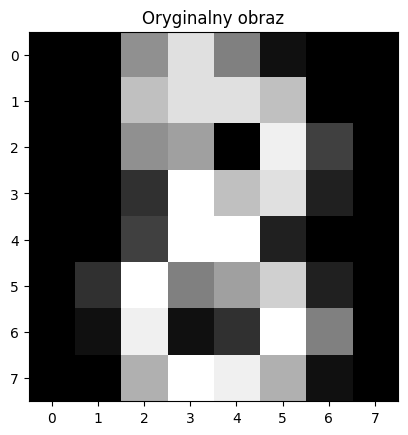

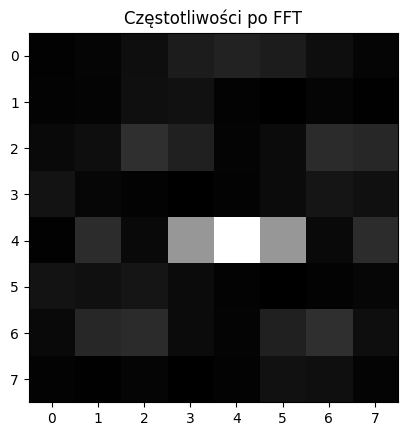

Nowy kształt cech: (1347, 64)


In [10]:

from scipy.fftpack import fft2, fftshift
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = datasets.load_digits()
y = data['target']
x = data['data']

def extract_frequency_features(images):
    transformed_images = []
    for img in images:
        # Przekształcenie obrazu do macierzy 8x8
        img_2d = img.reshape(8, 8)
        fft_img = np.abs(fft2(img_2d))
        #wykonujemy transformatę Furiera n obrazie, żeby zamienić go z dziedziny przestrzennej na częstotliwościową
        #wynikiem tego jest macierz 8x8, która zawiera informacje o częstotliwościach w obrazie
        low_freq_features = fft_img.flatten()  
        transformed_images.append(low_freq_features)
    return np.array(transformed_images)


# Ekstrakcja cech częstotliwościowych
x_freq = extract_frequency_features(x)
# Podział na zbiór uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(x_freq, y, random_state=1234)

# Normalizacja
x_scale = np.max(x_train)
x_train = x_train / x_scale
x_test = x_test / x_scale
#print("max x train", x_scale) #427
# Trenowanie modelu logistycznej regresji wieloklasowej
m, n = x_train.shape
num_classes = 10

theta_list = []
for cls_id in range(num_classes):
    y_cls = (y_train == cls_id).astype(np.int8).reshape(1, -1)
    X_cls = np.concatenate([np.ones((1, y_cls.shape[1])), x_train.T])
    theta_cls = np.zeros((X_cls.shape[0], 1))
    theta_cls, _ = min_gradient_prosty(X_cls, y_cls, theta_cls, 0.01, 1e-6)
    theta_list.append(theta_cls)
print(f" dlugosc theta {len(theta_list)}")
# Predykcja
y_pred = []
for example in x_test:
    X_example = np.concatenate(([1], example)).reshape(-1, 1)
    probabilities = [h_fun(X_example, theta).item() for theta in theta_list]
    y_pred.append(np.argmax(probabilities))

y_pred = np.array(y_pred)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Wyświetlenie wyników
print(f"Dokładność modelu: {accuracy * 100:.2f}%")
print("Macierz konfuzji:")
print(conf_matrix)
print("Raport klasyfikacji:")
print(report)

# Wyświetlenie przykładowej transformacji
plt.imshow(x[8].reshape(8, 8), cmap='gray')
plt.title("Oryginalny obraz")
plt.show()

plt.imshow(np.abs(fftshift(fft2(x[8].reshape(8, 8)))), cmap='gray')
plt.title("Częstotliwości po FFT")
plt.show()

print(f"Nowy kształt cech: {x_train.shape}")  # Powinno być mniej cech niż 64